In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

import os
import cv2
import csv

In [2]:
df_tsv = pd.read_table('train_master.tsv')
df_tsv


,file_name,category_id
0,train_0.jpg,43
1,train_1.jpg,5
2,train_2.jpg,39
3,train_3.jpg,12
4,train_4.jpg,42
5,train_5.jpg,14
6,train_6.jpg,48
7,train_7.jpg,13
8,train_8.jpg,27
9,train_9.jpg,24


In [3]:
df_tsv2 = pd.read_table('master.tsv')
df_tsv2


,abokado,0
0,asupara,1
1,banana,2
2,burokkori,3
3,chingensai,4
4,daikon,5
5,ebi,6
6,edamame,7
7,enoki,8
8,eringi,9
9,gobo,10


In [4]:
asp=df_tsv[df_tsv["category_id"] == 1 ]

In [5]:
lem=df_tsv[df_tsv["category_id"] == 36 ]

In [6]:
tak=df_tsv[df_tsv["category_id"] == 47 ]

In [7]:
df_tsv[df_tsv["category_id"] == 1 ].index.values

array([  115,   153,   239,   408,   505,   559,   560,   590,   619,
         630,   714,   812,   912,   913,   916,  1005,  1092,  1289,
        1440,  1481,  1608,  1759,  1779,  1804,  1900,  1931,  1985,
        1992,  2152,  2294,  2345,  2359,  2422,  2439,  2450,  2459,
        2510,  2534,  2709,  2718,  2823,  2855,  2878,  2914,  2952,
        2995,  3054,  3109,  3117,  3124,  3171,  3190,  3195,  3289,
        3356,  3418,  3437,  3507,  3596,  3621,  3828,  3882,  3892,
        3893,  3933,  3978,  4141,  4170,  4179,  4202,  4222,  4285,
        4292,  4294,  4476,  4571,  4594,  4664,  4731,  4762,  4801,
        4808,  4895,  4976,  4999,  5126,  5302,  5332,  5347,  5359,
        5395,  5425,  5445,  5481,  5495,  5508,  5634,  5664,  5685,
        5779,  5984,  5994,  6000,  6148,  6276,  6451,  6463,  6466,
        6497,  6508,  6768,  6786,  6815,  6871,  6918,  7163,  7205,
        7257,  7345,  7368,  7396,  7410,  7472,  7496,  7537,  7628,
        7771,  7849,

In [8]:
index = df_tsv.index

In [9]:
#trainの画像データのみを読み込む
file = os.listdir('images') # imgフォルダにあるファイルの名前を取得し配列化する
ID = df_tsv[df_tsv["category_id"] == 1 ].index.values
asp_train = np.array([(cv2.imread('images/train_%d.jpg' %index))for index in ID])

In [10]:
for image in asp_train:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
asp_train

array([array([[[ 64, 100, 178],
        [ 66, 102, 180],
        [ 68, 104, 182],
        ...,
        [ 65, 109, 186],
        [ 64, 108, 185],
        [ 66, 110, 187]],

       [[ 91, 127, 205],
        [ 91, 127, 205],
        [ 90, 126, 204],
        ...,
        [ 67, 111, 188],
        [ 67, 111, 188],
        [ 65, 109, 186]],

       [[ 96, 132, 210],
        [101, 137, 215],
        [102, 138, 216],
        ...,
        [ 63, 105, 182],
        [ 61, 103, 180],
        [ 55,  97, 174]],

       ...,

       [[ 50,  92, 169],
        [ 48,  90, 167],
        [ 48,  90, 167],
        ...,
        [ 52,  91, 165],
        [ 53,  92, 166],
        [ 54,  91, 165]],

       [[ 44,  87, 166],
        [ 45,  88, 167],
        [ 49,  93, 170],
        ...,
        [ 49,  88, 162],
        [ 48,  87, 161],
        [ 47,  86, 160]],

       [[ 39,  82, 161],
        [ 45,  88, 167],
        [ 50,  93, 172],
        ...,
        [ 47,  87, 159],
        [ 44,  84, 156],
        [ 43,  83

In [12]:
len(asp_train)

204

In [13]:
asp_train.shape

(204,)

In [14]:
type(asp_train)

numpy.ndarray

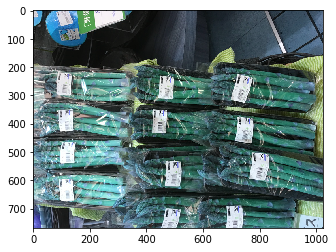

In [15]:
plt.imshow(asp_train[123])
plt.show()

In [16]:
def center(asp_train):
# 画像サイズを一度拡大する
    zoomed_asp = cv2.resize(asp_train, None,fx=5.0, fy=5.0)

# 変換前後のshapeを指定する
    height_1, width_1, channel_1 = asp_train.shape
    height_2, width_2, channel_2 = zoomed_asp.shape

# x、y軸それぞれの切り取り開始点の決定
# ピクセルの指定は整数になるようにする
    x =  int((width_2 - width_1) / 2)
    y =  int((height_2 - height_1) / 2)

#切り取り開始点から元の画像分のサイズを切り取る
    zoomed_asp = zoomed_asp[y:y+800, x:x+800]

# 拡大前の画像を出力
    plt.subplot(121)
    plt.imshow(asp_train)
# 拡大後の画像を出力
    plt.subplot(122)
    plt.imshow(zoomed_asp)
    
    return zoomed_asp

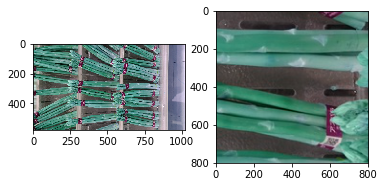

In [17]:
asp_trains=[ ]

for image in asp_train:
    asp_trains.append(center(image))

In [18]:
type(asp_trains)

list

In [19]:
asp_trains=np.array(asp_trains)

In [20]:
#trainの画像データのみを読み込む
file = os.listdir('images') # imgフォルダにあるファイルの名前を取得し配列化する
ID = df_tsv[df_tsv["category_id"] == 36 ].index.values
lem_train = np.array([(cv2.imread('images/train_%d.jpg' %index))for index in ID])
print(lem_train)

[array([[[  1,   0,   9],
        [  1,   0,   9],
        [  1,   0,   9],
        ...,
        [165, 153, 149],
        [166, 154, 150],
        [167, 155, 151]],

       [[  1,   0,   9],
        [  1,   0,   9],
        [  0,   0,   8],
        ...,
        [166, 154, 150],
        [166, 154, 150],
        [167, 155, 151]],

       [[  1,   0,   9],
        [  1,   0,   9],
        [  0,   0,   8],
        ...,
        [167, 155, 151],
        [167, 155, 151],
        [168, 156, 152]],

       ...,

       [[  0,   1,  10],
        [  0,   0,  10],
        [  0,   0,  10],
        ...,
        [164, 152, 148],
        [163, 151, 147],
        [162, 150, 146]],

       [[  0,   1,  10],
        [  0,   0,  10],
        [  0,   1,  11],
        ...,
        [164, 152, 148],
        [164, 152, 148],
        [163, 151, 147]],

       [[  0,   1,  10],
        [  0,   1,  10],
        [  0,   1,  11],
        ...,
        [163, 151, 147],
        [164, 152, 148],
        [165, 153, 149]

In [21]:
for image in lem_train:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

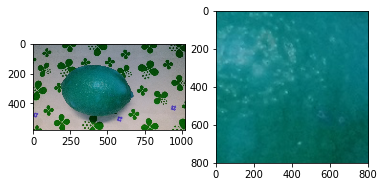

In [22]:
lem_trains=[ ]

for image in lem_train:
    lem_trains.append(center(image))

In [23]:
len(lem_trains)

221

In [24]:
lem_trains=np.array(lem_trains)

In [25]:
#trainの画像データのみを読み込む
file = os.listdir('images') # imgフォルダにあるファイルの名前を取得し配列化する
ID = df_tsv[df_tsv["category_id"] == 47 ].index.values
tak_train = np.array([(cv2.imread('images/train_%d.jpg' %index))for index in ID])
print(tak_train)

[array([[[163, 155, 162],
        [161, 153, 160],
        [160, 152, 159],
        ...,
        [189, 178, 180],
        [190, 179, 181],
        [193, 182, 184]],

       [[168, 161, 166],
        [165, 158, 163],
        [162, 155, 160],
        ...,
        [194, 183, 185],
        [195, 184, 186],
        [197, 186, 188]],

       [[176, 166, 172],
        [169, 162, 167],
        [164, 157, 162],
        ...,
        [201, 190, 192],
        [201, 190, 192],
        [202, 191, 193]],

       ...,

       [[141, 181, 216],
        [138, 178, 213],
        [135, 175, 210],
        ...,
        [137, 151, 180],
        [138, 152, 181],
        [141, 155, 184]],

       [[142, 182, 217],
        [137, 177, 212],
        [137, 177, 212],
        ...,
        [134, 149, 182],
        [139, 154, 187],
        [143, 158, 191]],

       [[144, 184, 219],
        [136, 176, 211],
        [139, 179, 214],
        ...,
        [129, 144, 177],
        [137, 152, 185],
        [145, 160, 193]

In [26]:
for image in tak_train:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

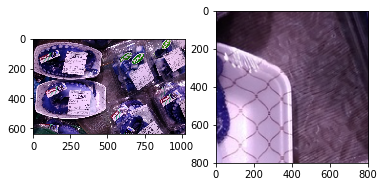

In [27]:
tak_trains=[ ]

for image in tak_train:
    tak_trains.append(center(image))

In [28]:
len(tak_trains)

178

In [29]:
tak_trains=np.array(tak_trains)

In [30]:
tak_trains.shape

(178, 800, 800, 3)

In [31]:
asp_trains= np.concatenate([asp_trains,lem_trains], axis=0)

In [32]:
asp_trains=np.concatenate([asp_trains,tak_trains], axis=0)

In [33]:
asp_trains.shape

(603, 800, 800, 3)

In [66]:
y_train=asp.append(lem)

In [67]:
y_train=y_train.append(tak)

In [68]:
y_train.head()

,file_name,category_id
115,train_115.jpg,1
153,train_153.jpg,1
239,train_239.jpg,1
408,train_408.jpg,1
505,train_505.jpg,1


In [69]:
x_train = asp_trains

In [70]:
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [71]:
y_train = y_train["category_id"]

In [72]:
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [73]:
x_train.shape

(603, 800, 800, 3)

In [74]:
y_train.shape

(603,)

In [75]:
y_train

115       1
153       1
239       1
408       1
505       1
559       1
560       1
590       1
619       1
630       1
714       1
812       1
912       1
913       1
916       1
1005      1
1092      1
1289      1
1440      1
1481      1
1608      1
1759      1
1779      1
1804      1
1900      1
1931      1
1985      1
1992      1
2152      1
2294      1
         ..
9565     47
9786     47
9795     47
9830     47
9899     47
9958     47
9987     47
10004    47
10068    47
10103    47
10119    47
10323    47
10328    47
10434    47
10441    47
10460    47
10600    47
10685    47
11052    47
11161    47
11174    47
11179    47
11292    47
11438    47
11569    47
11576    47
11604    47
11891    47
11957    47
11981    47
Name: category_id, Length: 603, dtype: int64

In [76]:
#Kerasに入力するためにyをOne-Hot表現に変換
#（例：[1, 0, 2] -> [[0, 1, 0],[1, 0, 0],[0, 0, 1]])
y_train = np.identity(48)[y_train].astype('i')

In [77]:
y_train

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int32)

In [78]:
# サンプル数を確認
N_train = len(x_train)
print(N_train)

603


In [79]:
len(y_train)

603

In [80]:
print(x_train.shape)

(603, 800, 800, 3)


In [65]:
# 正規化処理
x_train /= 255.0

TypeError: ufunc 'true_divide' output (typecode 'd') could not be coerced to provided output parameter (typecode 'B') according to the casting rule ''same_kind''